In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
file_path= r"C:\Users\sandi\Desktop\My Git\Netflix Recommender System\data.csv"
data = pd.read_csv(file_path, names=['Movie_Id', 'User_Id', 'User_Rating', 'Date'])

data.head()

,Movie_Id,User_Id,User_Rating,Date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Movie_Id     int64 
 1   User_Id      int64 
 2   User_Rating  int64 
 3   Date         object
dtypes: int64(3), object(1)
memory usage: 3.0+ GB


In [108]:
data.nunique()

Movie_Id        17770
User_Id        480189
User_Rating         5
Date             2182
dtype: int64

The 'Date' column is not in the datetime format so let's convert it into datetime format first.

In [109]:
data['Date'] = pd.to_datetime(data['Date'])

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Movie_Id     int64         
 1   User_Id      int64         
 2   User_Rating  int64         
 3   Date         datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.0 GB


Let's sort the ratings by date in ascending order.

In [111]:
data.sort_values(by='Date', inplace=True)
data

,Movie_Id,User_Id,User_Rating,Date
56431994,10341,510180,4,1999-11-11
9056171,1798,510180,5,1999-11-11
58698779,10774,510180,3,1999-11-11
48101611,8651,510180,2,1999-11-11
81893208,14660,510180,2,1999-11-11
...,...,...,...,...
49939086,8993,2183787,4,2005-12-31
42072268,7430,258170,4,2005-12-31
47098649,8467,1534359,5,2005-12-31
55621336,10168,2543295,2,2005-12-31


In [112]:
import chardet

def detect_encoding(file_path):
    with open(file_path, 'rb') as file:
        result = chardet.detect(file.read())
    return result['encoding']

file_path = r"C:\Users\sandi\Desktop\My Git\Netflix Recommender System\movie_titles.csv"

csv_encoding = detect_encoding(file_path)
print(csv_encoding)


ISO-8859-1


In [113]:
path = r"C:\Users\sandi\Desktop\My Git\Netflix Recommender System\movie_titles.csv"

# Read the CSV file line by line and split each line using the first two commas
with open(path, 'r', encoding='ISO-8859-1') as file:
    lines = file.readlines()

data_list = []
for line in lines:
    parts = line.strip().split(',', 2)  # Split into three parts at most: Movie_Id, Year, Movie_Title
    data_list.append(parts)

# Create a DataFrame from the processed data
movie_data = pd.DataFrame(data_list, columns=['Movie_Id', 'Year', 'Movie_Title'])

# Convert 'Movie_Id' and 'Year' columns to appropriate data types
movie_data['Movie_Id'] = movie_data['Movie_Id'].astype(int)
movie_data['Year'] = pd.to_numeric(movie_data['Year'], errors='coerce')

movie_data.head()

,Movie_Id,Year,Movie_Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [114]:
movie_data.shape

(17770, 3)

In [115]:
movie_data.isnull().mean()

Movie_Id       0.000000
Year           0.000394
Movie_Title    0.000000
dtype: float64

In [116]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie_Id     17770 non-null  int32  
 1   Year         17763 non-null  float64
 2   Movie_Title  17770 non-null  object 
dtypes: float64(1), int32(1), object(1)
memory usage: 347.2+ KB


In [117]:
# Create a copy of the 'data' dataset
merged_movie_data = data.copy()

# Create a dictionary mapping Movie_Id to Movie_Title
movie_id_to_title = dict(zip(movie_data['Movie_Id'], movie_data['Movie_Title']))

# Create a new column 'Movie_Title' in the merged_movie_dataset based on the mapping
merged_movie_data['Movie_Title'] = merged_movie_data['Movie_Id'].map(movie_id_to_title)

# Now 'merged_movie_dataset' contains a 'Movie_Title' column assigned to it

In [118]:
merged_movie_data

,Movie_Id,User_Id,User_Rating,Date,Movie_Title
56431994,10341,510180,4,1999-11-11,Ponette
9056171,1798,510180,5,1999-11-11,Lethal Weapon
58698779,10774,510180,3,1999-11-11,Taxi Driver
48101611,8651,510180,2,1999-11-11,Analyze This
81893208,14660,510180,2,1999-11-11,The Waterboy
...,...,...,...,...,...
49939086,8993,2183787,4,2005-12-31,Family Guy Presents: Stewie Griffin: The Untol...
42072268,7430,258170,4,2005-12-31,Six Feet Under: Season 1
47098649,8467,1534359,5,2005-12-31,Eraser
55621336,10168,2543295,2,2005-12-31,The League of Extraordinary Gentlemen


In [119]:
merged_movie_data.nunique()

Movie_Id        17770
User_Id        480189
User_Rating         5
Date             2182
Movie_Title     17359
dtype: int64

As we can see there are 480189 users and 17770 Movie_Ids but 17359 Movie_titles. So let's see if there is any null values.

In [120]:
merged_movie_data.isnull().mean()

Movie_Id       0.0
User_Id        0.0
User_Rating    0.0
Date           0.0
Movie_Title    0.0
dtype: float64

There is some null value in the 'Year' column but there are no null values in 'Movie_Id' and Movie_Title' column thus there may be same Movie_Id for more than one Movie_Title. Let's check it.

In [121]:
# Group by Movie_Title and check the number of unique Movie_Id values
title_id_counts = merged_movie_data.groupby('Movie_Title')['Movie_Id'].nunique()

# Filter titles with more than one unique Movie_Id
titles_with_multiple_ids = title_id_counts[title_id_counts > 1]

# Print the titles and the associated counts
print("Movie Titles with Multiple Movie Ids:")
print(titles_with_multiple_ids)
len(merged_movie_data)

Movie Titles with Multiple Movie Ids:
Movie_Title
20,000 Leagues Under the Sea    3
A Christmas Carol               3
A Dog of Flanders               2
A Farewell to Arms              2
A Kiss Before Dying             2
                               ..
We're No Angels                 2
Whatever It Takes               2
Where the Heart Is              2
Where the Red Fern Grows        2
Wonderland                      2
Name: Movie_Id, Length: 365, dtype: int64


100480507

In [122]:
# Group by Movie_Title and get the list of unique Movie_Id values
title_id_lists = merged_movie_data.groupby('Movie_Title')['Movie_Id'].unique()

# Filter titles with more than one unique Movie_Id
titles_with_multiple_ids = title_id_lists[title_id_lists.apply(len) > 1]

print("the number of movies with non-unique Movie_Ids are: ", len(titles_with_multiple_ids))

# Print the titles and the corresponding Movie_Id lists
for title, ids in titles_with_multiple_ids.items():
    print(f"Movie Title: {title}, Movie Ids: {ids}")


the number of movies with non-unique Movie_Ids are:  365
Movie Title: 20,000 Leagues Under the Sea, Movie Ids: [  394 11114  9500]
Movie Title: A Christmas Carol, Movie Ids: [ 5330 11941  4179]
Movie Title: A Dog of Flanders, Movie Ids: [8968 1827]
Movie Title: A Farewell to Arms, Movie Ids: [1556 2666]
Movie Title: A Kiss Before Dying, Movie Ids: [ 4927 13576]
Movie Title: A Midsummer Night's Dream, Movie Ids: [7221 9026]
Movie Title: A Night at the Opera, Movie Ids: [9148  253]
Movie Title: A Raisin in the Sun, Movie Ids: [15846 16045]
Movie Title: A Star Is Born, Movie Ids: [ 5355 15862]
Movie Title: Alfie, Movie Ids: [14242  7249]
Movie Title: Alice, Movie Ids: [17685 13393]
Movie Title: Alice in Wonderland, Movie Ids: [13629  4713]
Movie Title: Alive, Movie Ids: [11752 16378]
Movie Title: All Quiet on the Western Front, Movie Ids: [ 3224 12998]
Movie Title: Alone in the Dark, Movie Ids: [16090  4974]
Movie Title: Always, Movie Ids: [17057  7394]
Movie Title: Anastasia, Movie Ids: 

So as we can see there are 365 movies which has two or more Movie_Ids, so it would be better to retain only one of their Movie_Id by replacing with the other (preferably the first one).

In [123]:
# Mapping of Movie_Title to the corresponding first Movie_Id
first_ids_mapping = merged_movie_data.drop_duplicates(subset=['Movie_Title']).set_index('Movie_Title')['Movie_Id']

# Update Movie_Id values for duplicates
merged_movie_data['Movie_Id'] = merged_movie_data['Movie_Title'].map(first_ids_mapping)

merged_movie_data

,Movie_Id,User_Id,User_Rating,Date,Movie_Title
56431994,10341,510180,4,1999-11-11,Ponette
9056171,1798,510180,5,1999-11-11,Lethal Weapon
58698779,10774,510180,3,1999-11-11,Taxi Driver
48101611,8651,510180,2,1999-11-11,Analyze This
81893208,14660,510180,2,1999-11-11,The Waterboy
...,...,...,...,...,...
49939086,8993,2183787,4,2005-12-31,Family Guy Presents: Stewie Griffin: The Untol...
42072268,7430,258170,4,2005-12-31,Six Feet Under: Season 1
47098649,8467,1534359,5,2005-12-31,Eraser
55621336,10168,2543295,2,2005-12-31,The League of Extraordinary Gentlemen


In [124]:
type(merged_movie_data)

pandas.core.frame.DataFrame

In [125]:
merged_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100480507 entries, 56431994 to 25464092
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Movie_Id     int64         
 1   User_Id      int64         
 2   User_Rating  int64         
 3   Date         datetime64[ns]
 4   Movie_Title  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.5+ GB


In [126]:
merged_movie_data.nunique()

Movie_Id        17359
User_Id        480189
User_Rating         5
Date             2182
Movie_Title     17359
dtype: int64

Now the number of unique Movie_Id and Movie_Title do match

In [127]:
merged_movie_data.isnull().mean()

Movie_Id       0.0
User_Id        0.0
User_Rating    0.0
Date           0.0
Movie_Title    0.0
dtype: float64

In [128]:
deduplicated_data = merged_movie_data.drop_duplicates()

deduplicated_data

,Movie_Id,User_Id,User_Rating,Date,Movie_Title
56431994,10341,510180,4,1999-11-11,Ponette
9056171,1798,510180,5,1999-11-11,Lethal Weapon
58698779,10774,510180,3,1999-11-11,Taxi Driver
48101611,8651,510180,2,1999-11-11,Analyze This
81893208,14660,510180,2,1999-11-11,The Waterboy
...,...,...,...,...,...
49939086,8993,2183787,4,2005-12-31,Family Guy Presents: Stewie Griffin: The Untol...
42072268,7430,258170,4,2005-12-31,Six Feet Under: Season 1
47098649,8467,1534359,5,2005-12-31,Eraser
55621336,10168,2543295,2,2005-12-31,The League of Extraordinary Gentlemen


In [129]:
duplicate_rows_deleted= merged_movie_data.shape[0]- deduplicated_data.shape[0]
print("Number of dulicate rows deleted=", duplicate_rows_deleted)

Number of dulicate rows deleted= 58665


In [130]:
merged_movie_data= deduplicated_data

merged_movie_data

,Movie_Id,User_Id,User_Rating,Date,Movie_Title
56431994,10341,510180,4,1999-11-11,Ponette
9056171,1798,510180,5,1999-11-11,Lethal Weapon
58698779,10774,510180,3,1999-11-11,Taxi Driver
48101611,8651,510180,2,1999-11-11,Analyze This
81893208,14660,510180,2,1999-11-11,The Waterboy
...,...,...,...,...,...
49939086,8993,2183787,4,2005-12-31,Family Guy Presents: Stewie Griffin: The Untol...
42072268,7430,258170,4,2005-12-31,Six Feet Under: Season 1
47098649,8467,1534359,5,2005-12-31,Eraser
55621336,10168,2543295,2,2005-12-31,The League of Extraordinary Gentlemen


<span style="color: yellow;"> As we have the merged data at this time it would better to separate the dataset into train and test set. We will divide the dataset into time based splitting with 80% data as train data and 20% data as test data. A time based splitting is preferred here as new movies and users get added with time which can be recommended to the existing and new users based on previous ratings on eisting movies.</span>


In [131]:
split_index = int(len(merged_movie_data) * 0.8)

# Split the dataset into train and test sets
train_data = merged_movie_data[:split_index]
test_data = merged_movie_data[split_index:]

# Print the shapes of the train and test sets
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (80337473, 5)
Test data shape: (20084369, 5)


In [132]:
avg_user_rating= round(train_data['User_Rating'].mean(), 6)

print("The average user rating is:", avg_user_rating)

The average user rating is: 3.582673


In [133]:
train_data.loc[:, 'day_of_week'] = train_data['Date'].dt.day_name()

train_data

C:\Users\sandi\AppData\Local\Temp\ipykernel_9560\2701506634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:, 'day_of_week'] = train_data['Date'].dt.day_name()


,Movie_Id,User_Id,User_Rating,Date,Movie_Title,day_of_week
56431994,10341,510180,4,1999-11-11,Ponette,Thursday
9056171,1798,510180,5,1999-11-11,Lethal Weapon,Thursday
58698779,10774,510180,3,1999-11-11,Taxi Driver,Thursday
48101611,8651,510180,2,1999-11-11,Analyze This,Thursday
81893208,14660,510180,2,1999-11-11,The Waterboy,Thursday
...,...,...,...,...,...,...
89300646,15861,1427171,5,2005-08-08,CSI: Season 2,Monday
34759488,6235,410155,4,2005-08-08,A Walk to Remember,Monday
51275215,9257,841655,3,2005-08-08,It Was a Wonderful Life,Monday
2340452,443,1732760,5,2005-08-08,Rabbit-Proof Fence,Monday


C:\Users\sandi\AppData\Local\Temp\ipykernel_9560\1169264591.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_y_ticks)


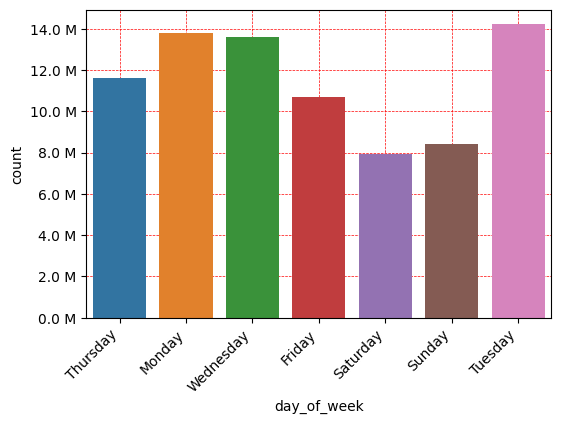

In [134]:
# Create a count plot using Seaborn
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=train_data, x='day_of_week')

# Format y-axis labels using the readable function
def readable(num, units='M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num / 10**3) + " K"
    elif units == 'm':
        return str(num / 10**6) + " M"
    elif units == 'b':
        return str(num / 10**9) + " B"

# Get y-axis ticks
y_ticks = ax.get_yticks()
formatted_y_ticks = [readable(y) for y in y_ticks]

# Set formatted y-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

ax.set_yticklabels(formatted_y_ticks)

# Set grid lines to be rendered below other plot elements
ax.set_axisbelow(True)

# Add grid lines with red color
ax.grid(True, color='red', linestyle='--', linewidth=0.5)

plt.show()

From the above analysis it shows that people watch more movies/ tv shows on weekdays while on weekends the number of ratings are fewer.

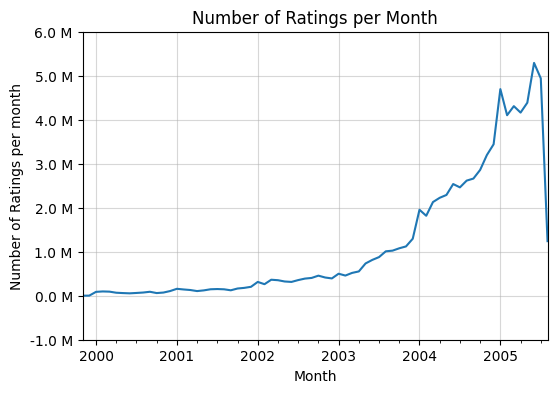

In [135]:
plt.figure(figsize=(6, 4))
ax = train_data.resample('M', on='Date')['User_Rating'].count().plot()

ax.set_title('Number of Ratings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Ratings per month')

# Format y-axis labels using the readable function
y_ticks = ax.get_yticks()
y_labels = [readable(value, 'M') for value in y_ticks]

# Set y-axis tick positions and labels
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)

# Customize other plot elements
ax.grid(True, alpha=0.5)
plt.axhline(y=y_ticks[-1], color='red', alpha=0.5, linewidth=0.5, linestyle='--')

plt.show()

Let's analyse the ratings by users, first let's check the most ratings then we will see the average number of ratings per user.

In [136]:
no_of_ratings_by_user= train_data.groupby(by='User_Id')['User_Rating'].count().sort_values(ascending=False)

print("The number of ratings by users are arranged in descending order as follows:")

no_of_ratings_by_user

The number of ratings by users are arranged in descending order as follows:


User_Id
305344     17111
2439493    15888
387418     15384
1639792     9761
1461435     9443
           ...  
822834         1
2197096        1
360874         1
2044007        1
2493785        1
Name: User_Rating, Length: 405038, dtype: int64

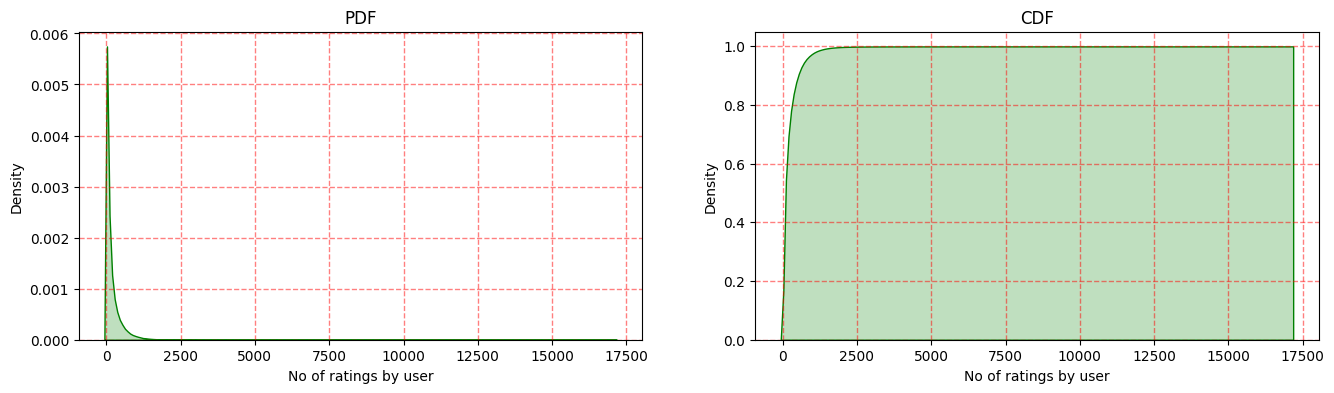

In [137]:
fig = plt.figure(figsize=plt.figaspect(.25))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_ratings_by_user, fill=True, color='green', ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_ratings_by_user, fill=True, color='green', cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

ax1.grid(True)
ax2.grid(True) 

# Set grid line properties
ax1.grid(color='red', alpha=0.5, linewidth=1, linestyle='--')
ax2.grid(color='red', alpha=0.5, linewidth=1, linestyle='--')

plt.show()

Let's analyse the rating given by a single user.

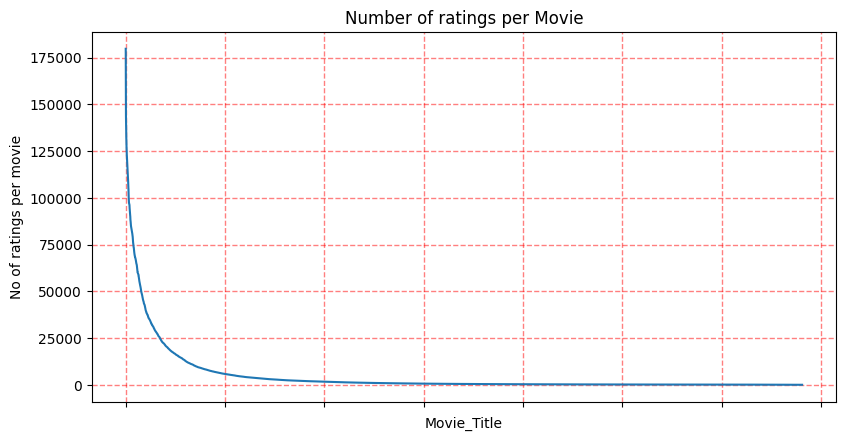

In [138]:
no_of_ratings_per_movie = train_data.groupby(by='Movie_Id')['User_Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('Number of ratings per Movie')
plt.xlabel('Movie_Title')
plt.ylabel('No of ratings per movie')
ax.set_xticklabels([])

ax.grid(True) 
ax.grid(color='red', alpha=0.5, linewidth=1, linestyle='--')

plt.show()

<span style="color: yellow;">The graph above shows there are some movies which has received a large number of ratings while there are movies which has received very few ratings. If the number of ratings correlates to number of times the movie has been watched then it dircetly translates to some movies are very popular thus has been watched many times/ by many users while other movies are not that popular.</span>


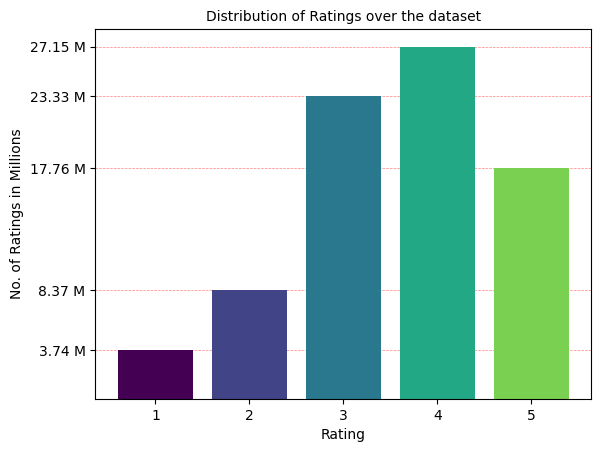

In [139]:
fig, ax = plt.subplots()
plt.title('Distribution of Ratings over the dataset', fontsize=10)

def readable(num, units='M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return "{:.2f} K".format(num / 10**3)
    elif units == 'm':
        return "{:.2f} M".format(num / 10**6)
    elif units == 'b':
        return "{:.2f} B".format(num / 10**9)

# Calculate value counts and sort by index (rating values)
rating_counts = train_data['User_Rating'].value_counts().sort_index()

y_ticks = rating_counts.values
y_labels = [readable(round(value, 2), 'M') for value in y_ticks]

# Create grid lines as horizontal lines
for y_tick in y_ticks:
    ax.axhline(y_tick, color='red', alpha=0.5, linewidth=0.5, linestyle='--', zorder=0)

# Plot bars on top of the grid lines
plt.bar(rating_counts.index, rating_counts.values, color=[plt.cm.viridis(idx / len(rating_counts)) for idx in range(len(rating_counts))], zorder=1)
plt.ylabel('No. of Ratings in Millions')
plt.xlabel('Rating')

# Manually set y-axis tick labels
plt.yticks(y_ticks, y_labels)

plt.show()


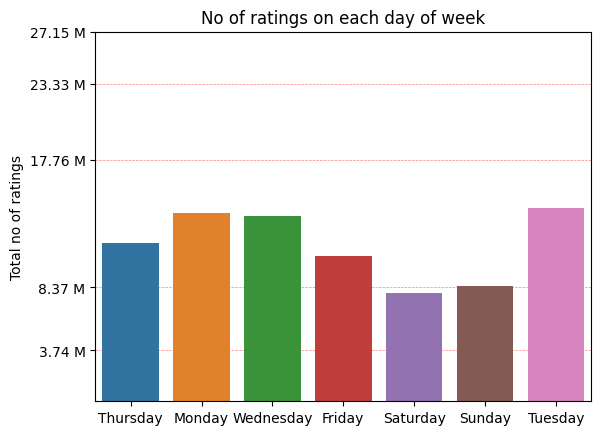

In [140]:
fig, ax = plt.subplots()

sns.countplot(x='day_of_week', data=train_data, ax=ax) 

plt.title('No of ratings on each day of week')
plt.xlabel('')
plt.ylabel('Total no of ratings')

# Adjust y-axis range to start from 0
ax.set_ylim(bottom=0)

# Get y-ticks and format using the readable function
y_ticks = train_data['User_Rating'].value_counts().sort_index().values
y_labels = [readable(y) for y in y_ticks]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)

# Add horizontal grid lines and set them behind the bars
for y in y_ticks:
    ax.axhline(y, color='red', alpha=0.5, linewidth=0.5, linestyle='--', zorder=-1)
    
plt.show()


In [141]:
avg_rating_per_day = train_data.groupby(by=['day_of_week'])['User_Rating'].mean()
print(" AVerage ratings")
print("-"*30)
print(round(avg_rating_per_day, 6))
print("\n")

 AVerage ratings
------------------------------
day_of_week
Friday       3.585045
Monday       3.577010
Saturday     3.591579
Sunday       3.593891
Thursday     3.582254
Tuesday      3.574245
Wednesday    3.583549
Name: User_Rating, dtype: float64




In [142]:
print("The number of users in the train datset is:", train_data['User_Id'].nunique())
print("The number of movies in the train datset is:", train_data['Movie_Id'].nunique())

The number of users in the train datset is: 405038
The number of movies in the train datset is: 17023


In [143]:
print("The total number of ratings by users in the tarin dataset is:", len(train_data['User_Rating']))

The total number of ratings by users in the tarin dataset is: 80337473


In [144]:
rated_percentage= round(((len(train_data['User_Rating'])/(train_data['User_Id'].nunique()))/(train_data['Movie_Id'].nunique()))*100, 6)

print("So the percentage of rated movies are:", rated_percentage)

So the percentage of rated movies are: 1.165162


In [145]:
train_data.head()

,Movie_Id,User_Id,User_Rating,Date,Movie_Title,day_of_week
56431994,10341,510180,4,1999-11-11,Ponette,Thursday
9056171,1798,510180,5,1999-11-11,Lethal Weapon,Thursday
58698779,10774,510180,3,1999-11-11,Taxi Driver,Thursday
48101611,8651,510180,2,1999-11-11,Analyze This,Thursday
81893208,14660,510180,2,1999-11-11,The Waterboy,Thursday


In [ ]:
#start

In [146]:
# Calculate average rating for each movie
average_ratings_each_movie = train_data.groupby('Movie_Title')['User_Rating'].mean()

# Calculate average rating given by each user
average_ratings_each_user = train_data.groupby('User_Id')['User_Rating'].mean()

# Use .loc to set new columns without triggering the warning
train_data.loc[:, 'average_ratings_each_movie'] = train_data['Movie_Title'].map(average_ratings_each_movie)
train_data.loc[:, 'average_ratings_each_user'] = train_data['User_Id'].map(average_ratings_each_user)

train_data

C:\Users\sandi\AppData\Local\Temp\ipykernel_9560\295050626.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:, 'average_ratings_each_movie'] = train_data['Movie_Title'].map(average_ratings_each_movie)
C:\Users\sandi\AppData\Local\Temp\ipykernel_9560\295050626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:, 'average_ratings_each_user'] = train_data['User_Id'].map(average_ratings_each_user)


,Movie_Id,User_Id,User_Rating,Date,Movie_Title,day_of_week,average_ratings_each_movie,average_ratings_each_user
56431994,10341,510180,4,1999-11-11,Ponette,Thursday,3.630459,3.368932
9056171,1798,510180,5,1999-11-11,Lethal Weapon,Thursday,3.937628,3.368932
58698779,10774,510180,3,1999-11-11,Taxi Driver,Thursday,3.892792,3.368932
48101611,8651,510180,2,1999-11-11,Analyze This,Thursday,3.371465,3.368932
81893208,14660,510180,2,1999-11-11,The Waterboy,Thursday,3.348533,3.368932
...,...,...,...,...,...,...,...,...
89300646,15861,1427171,5,2005-08-08,CSI: Season 2,Monday,4.460470,3.624549
34759488,6235,410155,4,2005-08-08,A Walk to Remember,Monday,3.809887,3.785714
51275215,9257,841655,3,2005-08-08,It Was a Wonderful Life,Monday,3.314795,3.202091
2340452,443,1732760,5,2005-08-08,Rabbit-Proof Fence,Monday,3.975123,3.615385


In [156]:
# Calculate average rating for each movie in train data
average_ratings_each_movie = train_data.groupby('Movie_Title')['User_Rating'].mean()

# Calculate average rating given by each user in train data
average_ratings_each_user = train_data.groupby('User_Id')['User_Rating'].mean()

# Map average_ratings_each_movie to test data, filling missing values with 0
test_data.loc[:, 'average_ratings_each_movie'] = test_data['Movie_Title'].map(average_ratings_each_movie).fillna(0)

# Map average_ratings_each_user to test data, filling missing values with 0
test_data.loc[:, 'average_ratings_each_user'] = test_data['User_Id'].map(average_ratings_each_user).fillna(0)

test_data.head()

C:\Users\sandi\AppData\Local\Temp\ipykernel_9560\446681871.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, 'average_ratings_each_movie'] = test_data['Movie_Title'].map(average_ratings_each_movie).fillna(0)
C:\Users\sandi\AppData\Local\Temp\ipykernel_9560\446681871.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, 'average_ratings_each_user'] = test_data['User_Id'].map(average_ratings_each_user).fillna(0)


,Movie_Id,User_Id,User_Rating,Date,Movie_Title,average_ratings_each_movie,average_ratings_each_user
26673915,4956,2315130,4,2005-08-08,Back to the Future Part II,3.998268,4.199418
34759490,6235,7921,5,2005-08-08,A Walk to Remember,3.809887,4.148599
26673914,4956,652700,4,2005-08-08,Back to the Future Part II,3.998268,3.940774
80103125,14454,576499,2,2005-08-08,Kill Bill: Vol. 1,3.747106,3.620690
99049984,17479,1010450,3,2005-08-08,The Ring,3.520087,4.000000


In [157]:
test_data.isnull().mean()

Movie_Id                      0.0
User_Id                       0.0
User_Rating                   0.0
Date                          0.0
Movie_Title                   0.0
average_ratings_each_movie    0.0
average_ratings_each_user     0.0
dtype: float64

In [158]:
global_average_ratings= train_data['User_Rating'].mean()

print("The global average of user ratings in teh train_data is:", round(global_average_ratings, 6))

The global average of user ratings in teh train_data is: 3.582673


In [159]:
# Update the DataFrame using .loc accessor
train_data.loc[:, 'movie_rating_variation'] = train_data.loc[:, 'average_ratings_each_movie']- global_average_ratings
train_data.loc[:, 'user_rating_bias'] = train_data.loc[:, 'average_ratings_each_user']- global_average_ratings

train_data

,Movie_Id,User_Id,User_Rating,Date,Movie_Title,day_of_week,average_ratings_each_movie,average_ratings_each_user,movie_rating_variation,user_rating_bias,User_Rating_Corrected
56431994,10341,510180,4,1999-11-11,Ponette,Thursday,3.630459,3.368932,0.047786,-0.213741,4.165954
9056171,1798,510180,5,1999-11-11,Lethal Weapon,Thursday,3.937628,3.368932,0.354956,-0.213741,4.858785
58698779,10774,510180,3,1999-11-11,Taxi Driver,Thursday,3.892792,3.368932,0.310119,-0.213741,2.903622
48101611,8651,510180,2,1999-11-11,Analyze This,Thursday,3.371465,3.368932,-0.211208,-0.213741,2.424948
81893208,14660,510180,2,1999-11-11,The Waterboy,Thursday,3.348533,3.368932,-0.234140,-0.213741,2.447880
...,...,...,...,...,...,...,...,...,...,...,...
89300646,15861,1427171,5,2005-08-08,CSI: Season 2,Monday,4.460470,3.624549,0.877797,0.041876,4.080327
34759488,6235,410155,4,2005-08-08,A Walk to Remember,Monday,3.809887,3.785714,0.227214,0.203041,3.569744
51275215,9257,841655,3,2005-08-08,It Was a Wonderful Life,Monday,3.314795,3.202091,-0.267877,-0.380582,3.648460
2340452,443,1732760,5,2005-08-08,Rabbit-Proof Fence,Monday,3.975123,3.615385,0.392450,0.032712,4.574838


If we subtract the 'movie_rating_variation' fron the 'User_Rating' we will get the personalised ratings by the users including their bias which is very important for capturing their personal choices.

In [160]:
train_data.loc[:, 'User_Rating_Corrected'] = train_data.loc[:, 'User_Rating']- (train_data.loc[:, 'movie_rating_variation']+ train_data.loc[:, 'user_rating_bias'])
train_data.head()

,Movie_Id,User_Id,User_Rating,Date,Movie_Title,day_of_week,average_ratings_each_movie,average_ratings_each_user,movie_rating_variation,user_rating_bias,User_Rating_Corrected
56431994,10341,510180,4,1999-11-11,Ponette,Thursday,3.630459,3.368932,0.047786,-0.213741,4.165954
9056171,1798,510180,5,1999-11-11,Lethal Weapon,Thursday,3.937628,3.368932,0.354956,-0.213741,4.858785
58698779,10774,510180,3,1999-11-11,Taxi Driver,Thursday,3.892792,3.368932,0.310119,-0.213741,2.903622
48101611,8651,510180,2,1999-11-11,Analyze This,Thursday,3.371465,3.368932,-0.211208,-0.213741,2.424948
81893208,14660,510180,2,1999-11-11,The Waterboy,Thursday,3.348533,3.368932,-0.234140,-0.213741,2.447880


In [162]:

test_data.loc[:, 'movie_rating_variation'] = test_data.loc[:, 'average_ratings_each_movie']- global_average_ratings
test_data.loc[:, 'user_rating_bias'] = test_data.loc[:, 'average_ratings_each_user']- global_average_ratings

test_data

C:\Users\sandi\AppData\Local\Temp\ipykernel_9560\1258234879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, 'movie_rating_variation'] = test_data.loc[:, 'average_ratings_each_movie']- global_average_ratings
C:\Users\sandi\AppData\Local\Temp\ipykernel_9560\1258234879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, 'user_rating_bias'] = test_data.loc[:, 'average_ratings_each_user']- global_average_ratings


,Movie_Id,User_Id,User_Rating,Date,Movie_Title,average_ratings_each_movie,average_ratings_each_user,movie_rating_variation,user_rating_bias
26673915,4956,2315130,4,2005-08-08,Back to the Future Part II,3.998268,4.199418,0.415595,0.616745
34759490,6235,7921,5,2005-08-08,A Walk to Remember,3.809887,4.148599,0.227214,0.565926
26673914,4956,652700,4,2005-08-08,Back to the Future Part II,3.998268,3.940774,0.415595,0.358102
80103125,14454,576499,2,2005-08-08,Kill Bill: Vol. 1,3.747106,3.620690,0.164433,0.038017
99049984,17479,1010450,3,2005-08-08,The Ring,3.520087,4.000000,-0.062586,0.417327
...,...,...,...,...,...,...,...,...,...
49939086,8993,2183787,4,2005-12-31,Family Guy Presents: Stewie Griffin: The Untol...,4.416667,3.951220,0.833994,0.368547
42072268,7430,258170,4,2005-12-31,Six Feet Under: Season 1,4.336437,3.366705,0.753765,-0.215967
47098649,8467,1534359,5,2005-12-31,Eraser,3.353878,4.500000,-0.228795,0.917327
55621336,10168,2543295,2,2005-12-31,The League of Extraordinary Gentlemen,3.024290,4.000000,-0.558382,0.417327


In [163]:
test_data.loc[:, 'User_Rating_Corrected'] = test_data.loc[:, 'User_Rating']- (test_data.loc[:, 'movie_rating_variation']+ test_data.loc[:, 'user_rating_bias'])
test_data.head()

C:\Users\sandi\AppData\Local\Temp\ipykernel_9560\3851535371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, 'User_Rating_Corrected'] = test_data.loc[:, 'User_Rating']- (test_data.loc[:, 'movie_rating_variation']+ test_data.loc[:, 'user_rating_bias'])


,Movie_Id,User_Id,User_Rating,Date,Movie_Title,average_ratings_each_movie,average_ratings_each_user,movie_rating_variation,user_rating_bias,User_Rating_Corrected
26673915,4956,2315130,4,2005-08-08,Back to the Future Part II,3.998268,4.199418,0.415595,0.616745,2.967660
34759490,6235,7921,5,2005-08-08,A Walk to Remember,3.809887,4.148599,0.227214,0.565926,4.206859
26673914,4956,652700,4,2005-08-08,Back to the Future Part II,3.998268,3.940774,0.415595,0.358102,3.226303
80103125,14454,576499,2,2005-08-08,Kill Bill: Vol. 1,3.747106,3.620690,0.164433,0.038017,1.797550
99049984,17479,1010450,3,2005-08-08,The Ring,3.520087,4.000000,-0.062586,0.417327,2.645259


In [164]:
test_data.isnull().mean()

Movie_Id                      0.0
User_Id                       0.0
User_Rating                   0.0
Date                          0.0
Movie_Title                   0.0
average_ratings_each_movie    0.0
average_ratings_each_user     0.0
movie_rating_variation        0.0
user_rating_bias              0.0
User_Rating_Corrected         0.0
dtype: float64

<span style="color: yellow;"> What we will do now is create a dataframe consisting of 'average_ratings_each_movie', 'average_ratings_each_user' and 'recommended_ratings_each_movie'. The features 'average_ratings_each_movie' and 'average_ratings_each_user' will serve as unique signature for each user which can be used to represent personal biases/ choices from the average population and same also stands for the movies. To make a new dataset let's drop all the unnecessary columns.</span>

In [165]:
train_data_modified= train_data.drop(['Date', 'Movie_Title', 'day_of_week', 'movie_rating_variation', 'user_rating_bias', 'User_Rating'], axis=1)

train_data_modified.head()

,Movie_Id,User_Id,average_ratings_each_movie,average_ratings_each_user,User_Rating_Corrected
56431994,10341,510180,3.630459,3.368932,4.165954
9056171,1798,510180,3.937628,3.368932,4.858785
58698779,10774,510180,3.892792,3.368932,2.903622
48101611,8651,510180,3.371465,3.368932,2.424948
81893208,14660,510180,3.348533,3.368932,2.447880


In [166]:
train_data_modified= train_data_modified.reset_index(drop= True)

train_data_modified.head()

,Movie_Id,User_Id,average_ratings_each_movie,average_ratings_each_user,User_Rating_Corrected
0,10341,510180,3.630459,3.368932,4.165954
1,1798,510180,3.937628,3.368932,4.858785
2,10774,510180,3.892792,3.368932,2.903622
3,8651,510180,3.371465,3.368932,2.424948
4,14660,510180,3.348533,3.368932,2.447880


In [167]:
train_data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80337473 entries, 0 to 80337472
Data columns (total 5 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Movie_Id                    int64  
 1   User_Id                     int64  
 2   average_ratings_each_movie  float64
 3   average_ratings_each_user   float64
 4   User_Rating_Corrected       float64
dtypes: float64(3), int64(2)
memory usage: 3.0 GB


In [168]:
# Convert columns to string/object data type
train_data_modified['Movie_Id'] = train_data_modified['Movie_Id'].astype(str)
train_data_modified['User_Id'] = train_data_modified['User_Id'].astype(str)


In [169]:
train_data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80337473 entries, 0 to 80337472
Data columns (total 5 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Movie_Id                    object 
 1   User_Id                     object 
 2   average_ratings_each_movie  float64
 3   average_ratings_each_user   float64
 4   User_Rating_Corrected       float64
dtypes: float64(3), object(2)
memory usage: 3.0+ GB


<span style="color: yellow;"> Let's do the same feature enginering on the test data.</span>

In [170]:
test_data_modified= test_data.drop(['Date', 'Movie_Title', 'movie_rating_variation', 'user_rating_bias', 'User_Rating'], axis=1)

test_data_modified.head()

,Movie_Id,User_Id,average_ratings_each_movie,average_ratings_each_user,User_Rating_Corrected
26673915,4956,2315130,3.998268,4.199418,2.967660
34759490,6235,7921,3.809887,4.148599,4.206859
26673914,4956,652700,3.998268,3.940774,3.226303
80103125,14454,576499,3.747106,3.620690,1.797550
99049984,17479,1010450,3.520087,4.000000,2.645259


In [171]:
test_data_modified= test_data_modified.reset_index(drop= True)

test_data_modified.head()

,Movie_Id,User_Id,average_ratings_each_movie,average_ratings_each_user,User_Rating_Corrected
0,4956,2315130,3.998268,4.199418,2.967660
1,6235,7921,3.809887,4.148599,4.206859
2,4956,652700,3.998268,3.940774,3.226303
3,14454,576499,3.747106,3.620690,1.797550
4,17479,1010450,3.520087,4.000000,2.645259


In [172]:
test_data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20084369 entries, 0 to 20084368
Data columns (total 5 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Movie_Id                    int64  
 1   User_Id                     int64  
 2   average_ratings_each_movie  float64
 3   average_ratings_each_user   float64
 4   User_Rating_Corrected       float64
dtypes: float64(3), int64(2)
memory usage: 766.2 MB


In [173]:
# Convert columns to string/object data type
test_data_modified['Movie_Id'] = test_data_modified['Movie_Id'].astype(str)
test_data_modified['User_Id'] = test_data_modified['User_Id'].astype(str)

In [174]:
test_data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20084369 entries, 0 to 20084368
Data columns (total 5 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Movie_Id                    object 
 1   User_Id                     object 
 2   average_ratings_each_movie  float64
 3   average_ratings_each_user   float64
 4   User_Rating_Corrected       float64
dtypes: float64(3), object(2)
memory usage: 766.2+ MB


<span style="color: yellow;"> Let's scale the data now</span>

In [175]:
from sklearn.preprocessing import StandardScaler

# Create an instance of MinMaxScaler
scaler = StandardScaler()

# Assuming 'train_data_modified' is your DataFrame
train_data_scaled = train_data_modified.copy()

# Get the column names before scaling
column_names = train_data_scaled.select_dtypes(include='number').drop(['User_Rating_Corrected'], axis=1).columns

# Fit the scaler on the entire DataFrame and transform the data
train_data_scaled[column_names] = scaler.fit_transform(train_data_scaled[column_names])

train_data_scaled.head()

,Movie_Id,User_Id,average_ratings_each_movie,average_ratings_each_user,User_Rating_Corrected
0,10341,510180,0.119424,-0.491306,4.165954
1,1798,510180,0.887080,-0.491306,4.858785
2,10774,510180,0.775027,-0.491306,2.903622
3,8651,510180,-0.527835,-0.491306,2.424948
4,14660,510180,-0.585145,-0.491306,2.447880


In [176]:
train_data_scaled_modified= train_data_scaled.drop(['Movie_Id',	'User_Id'], axis=1)
train_data_scaled_modified.head()

,average_ratings_each_movie,average_ratings_each_user,User_Rating_Corrected
0,0.119424,-0.491306,4.165954
1,0.887080,-0.491306,4.858785
2,0.775027,-0.491306,2.903622
3,-0.527835,-0.491306,2.424948
4,-0.585145,-0.491306,2.447880


In [177]:
from sklearn.preprocessing import StandardScaler

# Create an instance of MinMaxScaler
scaler = StandardScaler()

# Assuming 'train_data_modified' is your DataFrame
test_data_scaled = test_data_modified.copy()

# Get the column names before scaling
column_names = test_data_scaled.select_dtypes(include='number').drop(['User_Rating_Corrected'], axis=1).columns

# Fit the scaler on the entire DataFrame and transform the data
test_data_scaled[column_names] = scaler.fit_transform(test_data_scaled[column_names])

test_data_scaled.head()

,Movie_Id,User_Id,average_ratings_each_movie,average_ratings_each_user,User_Rating_Corrected
0,4956,2315130,0.771927,1.117725,2.967660
1,6235,7921,0.373864,1.090183,4.206859
2,4956,652700,0.771927,0.977551,3.226303
3,14454,576499,0.241203,0.804079,1.797550
4,17479,1010450,-0.238505,1.009649,2.645259


In [178]:
test_data_scaled_modified= test_data_scaled.drop(['Movie_Id', 'User_Id'], axis=1)
test_data_scaled_modified.head()

,average_ratings_each_movie,average_ratings_each_user,User_Rating_Corrected
0,0.771927,1.117725,2.967660
1,0.373864,1.090183,4.206859
2,0.771927,0.977551,3.226303
3,0.241203,0.804079,1.797550
4,-0.238505,1.009649,2.645259


<span style="color: green;"> Building Models</span>

In [179]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target
X = train_data_scaled_modified.drop(['User_Rating_Corrected'], axis=1) # Features from scaled DataFrame
y = train_data_scaled_modified['User_Rating_Corrected'] # Target variable

# Initialize the Ridge (L2 regularized) LinearRegression model with regularization parameter alpha
alpha = 0.1  # Adjust this value based on your preference
model_l2 = Ridge(alpha=alpha)

# Fit the model to the training data
model_l2.fit(X, y)

# Predict target values on the test set
y_pred = model_l2.predict(test_data_scaled_modified.drop(['User_Rating_Corrected'], axis=1))

# Calculate Mean Squared Error
mse = mean_squared_error(test_data_scaled_modified['User_Rating_Corrected'], y_pred)

rmse = np.sqrt(mse)

# Calculate R-squared value
r2 = r2_score(test_data_scaled_modified['User_Rating_Corrected'], y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared value: {r2:.2f}")

Root Mean Squared Error: 2.57
R-squared value: -0.48


In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target
X = train_data_scaled_modified.drop(['User_Rating_Corrected'], axis=1) # Features from scaled DataFrame
y = train_data_scaled_modified['User_Rating_Corrected'] # Target variable

# Initialize the DecisionTreeRegressor model with min_samples_leaf=100
model_dt = DecisionTreeRegressor(min_samples_leaf=100)

# Fit the model to the training data
model_dt.fit(X, y)

# Predict target values on the test set
y_pred = model_dt.predict(test_data_scaled_modified.drop(['User_Rating_Corrected'], axis=1))

# Calculate Mean Squared Error
mse = mean_squared_error(test_data_scaled_modified['User_Rating_Corrected'], y_pred)

rmse = np.sqrt(mse)

# Calculate R-squared value
r2 = r2_score(test_data_scaled_modified['User_Rating_Corrected'], y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared value: {r2:.2f}")

Root Mean Squared Error: 1.07
R-squared value: -0.07


<span style="color: yellow;"> Both linear regression and DecisionTreeRegressor are throwing good RMSE and R-Squared values. We will use linear regression as it is easy to tune and fast for predicting linear relationship. We will make a pivot table with 100 Movie_Id and 1000 User_Id from test_data to fill up the pivot table with our linear regression model. We will make a sample movie recommendation system based on 'recommended_ratings_each_movie' based on 'user rating'.</span>

In [84]:
num_users_to_select = 1000
num_movies_to_select = 100

# Get unique user IDs and movie IDs from the test_data
unique_user_ids = test_data_scaled['User_Id'].unique()
unique_movie_ids = test_data_scaled['Movie_Id'].unique()

# Randomly select 1000 unique user IDs
selected_user_ids = np.random.choice(unique_user_ids, size=num_users_to_select, replace=False)

# Randomly select 100 movie IDs
selected_movie_ids = np.random.choice(unique_movie_ids, size=num_movies_to_select, replace=False)

# Filter the test_data based on the selected user and movie IDs
filtered_data = test_data_scaled[(test_data_scaled['User_Id'].isin(selected_user_ids)) & (test_data_scaled['Movie_Id'].isin(selected_movie_ids))]

# Create a pivot table using the filtered data
pivot_table = pd.pivot_table(filtered_data, values='recommended_ratings_each_movie', index='User_Id', columns='Movie_Id')

# Display the pivot table
print(pivot_table)

Movie_Id  0.016377  0.048286  0.064213  0.080252  0.089369  0.089876  \
User_Id                                                                
0.002306       NaN  0.318708       NaN       NaN       NaN       NaN   
0.003622       NaN       NaN       NaN       NaN       NaN       NaN   
0.020883       NaN       NaN       NaN       NaN       NaN  0.286855   
0.023032       NaN       NaN       NaN       NaN       NaN       NaN   
0.027277       NaN       NaN       NaN       NaN       NaN       NaN   
...            ...       ...       ...       ...       ...       ...   
0.983693       NaN       NaN       NaN       NaN       NaN       NaN   
0.995541       NaN       NaN       NaN       NaN       NaN       NaN   
0.996471       NaN       NaN       NaN       NaN       NaN       NaN   
0.996728       NaN       NaN       NaN       NaN       NaN       NaN   
0.997506       NaN       NaN       NaN       NaN       NaN       NaN   

Movie_Id  0.090889  0.130564  0.136023  0.158985  ...  0.728009

<span style="color: yellow;">As per the above calculation as the percentage of rated that is actual filled rows are very sparse we can create a sparse matrix of User_Id and Movie_Title to fill the corresponding ratings while filling the non-available ratings as zero.</span>

In [93]:
from scipy.sparse import csr_matrix, save_npz, load_npz
import os

npz_file_path = r"C:\Users\sandi\Desktop\My Git\Netflix Recommender System\sparse_ratings_matrix_train.npz"

# Check if the NPZ file exists
if os.path.exists(npz_file_path):
    # Load the sparse matrix from the existing NPZ file
    sparse_ratings_matrix_train = load_npz(npz_file_path)
else:
    num_users = np.max(train_data['User_Id'])
    num_movies = np.max(train_data['Movie_Id'])
    sparse_ratings_matrix_train = csr_matrix((train_data['User_Rating'], (train_data['User_Id'], train_data['Movie_Id'])), shape=(num_users + 1, num_movies + 1))
    
    # Save the sparse matrix as an NPZ file
    save_npz(npz_file_path, sparse_ratings_matrix_train)

# Now you have the sparse matrix loaded or created and loaded
print(sparse_ratings_matrix_train)

  (6, 30)	3
  (6, 157)	3
  (6, 173)	4
  (6, 175)	5
  (6, 191)	2
  (6, 197)	3
  (6, 295)	4
  (6, 299)	3
  (6, 329)	4
  (6, 361)	3
  (6, 445)	3
  (6, 457)	5
  (6, 494)	3
  (6, 564)	4
  (6, 580)	3
  (6, 705)	3
  (6, 723)	3
  (6, 788)	3
  (6, 872)	3
  (6, 1096)	3
  (6, 1145)	3
  (6, 1180)	3
  (6, 1195)	4
  (6, 1220)	4
  (6, 1267)	3
  :	:
  (2649429, 15844)	5
  (2649429, 15952)	5
  (2649429, 16139)	4
  (2649429, 16242)	4
  (2649429, 16325)	4
  (2649429, 16339)	4
  (2649429, 16377)	5
  (2649429, 16390)	5
  (2649429, 16438)	4
  (2649429, 16459)	4
  (2649429, 16668)	5
  (2649429, 16765)	5
  (2649429, 16792)	5
  (2649429, 16879)	3
  (2649429, 16882)	5
  (2649429, 16901)	4
  (2649429, 17070)	4
  (2649429, 17088)	5
  (2649429, 17157)	3
  (2649429, 17308)	3
  (2649429, 17560)	5
  (2649429, 17580)	4
  (2649429, 17622)	4
  (2649429, 17627)	3
  (2649429, 17692)	2


In [94]:
user, movie = sparse_ratings_matrix_train.shape
non_zero_rating = sparse_ratings_matrix_train.count_nonzero()

print(f"Sparsity Of Train matrix : {round(((1-(non_zero_rating/(user*movie))) * 100), 4)}% ")

Sparsity Of Train matrix : 99.83% 


In [108]:
from scipy.sparse import csr_matrix, save_npz, load_npz
import os

npz_file_path = r"C:\Users\sandi\Desktop\My Git\Netflix Recommender System\sparse_ratings_matrix_test.npz"

# Check if the NPZ file exists
if os.path.exists(npz_file_path):
    # Load the sparse matrix from the existing NPZ file
    sparse_ratings_matrix_test = load_npz(npz_file_path)
else:
    num_users = np.max(test_data['User_Id'])
    num_movies = np.max(test_data['Movie_Id'])
    sparse_ratings_matrix_test = csr_matrix((test_data['User_Rating'], (test_data['User_Id'], test_data['Movie_Id'])), shape=(num_users + 1, num_movies + 1))
    
    # Save the sparse matrix as an NPZ file
    save_npz(npz_file_path, sparse_ratings_matrix_test)

# Now you have the sparse matrix loaded or created and loaded
print(sparse_ratings_matrix_test)

  (6, 241)	3
  (6, 468)	3
  (6, 501)	3
  (6, 535)	4
  (6, 658)	3
  (6, 706)	3
  (6, 825)	3
  (6, 886)	5
  (6, 1144)	2
  (6, 1238)	2
  (6, 1307)	1
  (6, 1476)	1
  (6, 1542)	3
  (6, 1571)	4
  (6, 1642)	4
  (6, 1709)	4
  (6, 1765)	3
  (6, 1843)	2
  (6, 1901)	4
  (6, 1939)	6
  (6, 2186)	4
  (6, 2189)	4
  (6, 2269)	3
  (6, 2340)	3
  (6, 2602)	3
  :	:
  (2649429, 2186)	5
  (2649429, 2755)	9
  (2649429, 3333)	5
  (2649429, 3624)	5
  (2649429, 5327)	4
  (2649429, 5401)	4
  (2649429, 5496)	5
  (2649429, 5952)	5
  (2649429, 6134)	4
  (2649429, 6475)	4
  (2649429, 6631)	4
  (2649429, 8393)	4
  (2649429, 9879)	5
  (2649429, 10550)	4
  (2649429, 10583)	3
  (2649429, 10947)	5
  (2649429, 11040)	5
  (2649429, 11077)	4
  (2649429, 11182)	5
  (2649429, 11495)	3
  (2649429, 12232)	4
  (2649429, 14240)	5
  (2649429, 14454)	1
  (2649429, 14538)	3
  (2649429, 15788)	5


In [109]:
user, movie = sparse_ratings_matrix_test.shape
non_zero_rating = sparse_ratings_matrix_test.count_nonzero()

print(f"Sparsity Of Test matrix : {round(((1-(non_zero_rating/(user*movie))) * 100), 4)}% ")

Sparsity Of Test matrix : 99.9574% 


In [111]:
train_averages = dict()
# get the global average of ratings in our train set.
train_global_average = sparse_ratings_matrix_train.sum()/sparse_ratings_matrix_train.count_nonzero()
train_averages['global'] = round(train_global_average, 4)
train_averages

{'global': 3.596}

In [104]:
def get_average_ratings(sparse_matrix, of_users):
    # Determine the axis for calculation (1 for users, 0 for movies)
    ax = 1 if of_users else 0
    
    # Sum of ratings for each user/movie
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    
    # Create a boolean matrix indicating if a user rated a movie
    is_rated = sparse_matrix != 0
    
    # Number of ratings for each user/movie
    no_of_ratings = is_rated.sum(axis=ax).A1
    
    # Get the shape of the sparse matrix (max_user, max_movie)
    max_user, max_movie = sparse_matrix.shape
    
    # Create a dictionary of users/movies and their average ratings
    average_ratings = {
        i: sum_of_ratings[i] / no_of_ratings[i]
        for i in range(max_user if of_users else max_movie)
        if no_of_ratings[i] != 0
                      }
    
    # Return the dictionary of average ratings
    return average_ratings

In [107]:
average_ratings_users = get_average_ratings(sparse_ratings_matrix_train, of_users=True)

average_ratings_movies = get_average_ratings(sparse_ratings_matrix_train, of_users=False)

In [126]:
train_data.head()

,Movie_Id,User_Id,User_Rating,Date,Movie_Title,day_of_week
56431994,10341,510180,4,1999-11-11,Ponette,Thursday
9056171,1798,510180,5,1999-11-11,Lethal Weapon,Thursday
58698779,10774,510180,3,1999-11-11,Taxi Driver,Thursday
48101611,8651,510180,2,1999-11-11,Analyze This,Thursday
81893208,14660,510180,2,1999-11-11,The Waterboy,Thursday


In [133]:
train_averages['User_Id'] = get_average_ratings(sparse_ratings_matrix_train, of_users=True)
print('\nAverage rating of user 510180 :',round(train_averages['User_Id'][510180], 4))


Average rating of user 510180 : 3.3872


In [136]:
train_averages['Movie_Id'] = get_average_ratings(sparse_ratings_matrix_train, of_users=False)
print('\nAverage rating of Movie_Id 10341 :',round(train_averages['Movie_Id'][10341], 4))


Average rating of Movie_Id 10341 : 3.6305


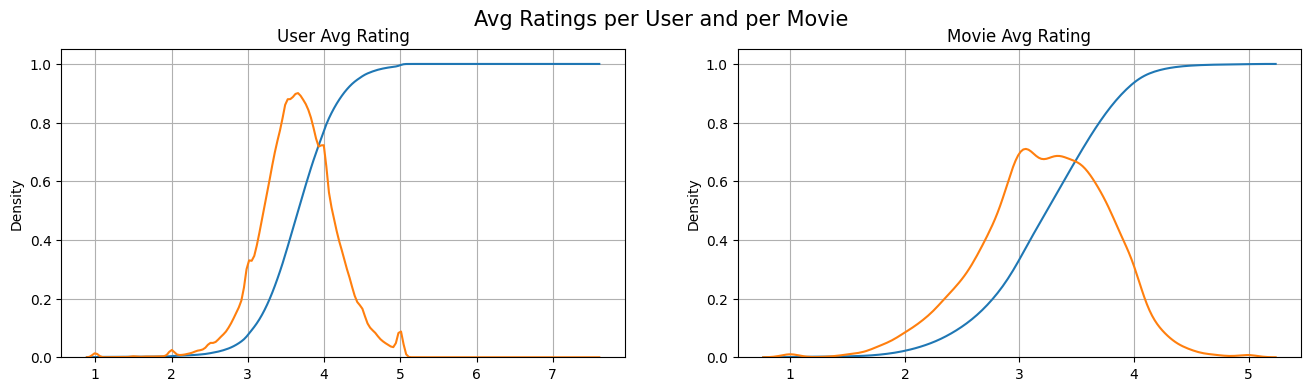

In [142]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.25))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=15)

ax1.set_title('User Avg Rating')
user_averages = [r for r in train_averages['User_Id'].values()]
sns.kdeplot(user_averages, ax=ax1, cumulative=True, label='CDF')
sns.kdeplot(user_averages, ax=ax1, label='PDF')
ax1.grid(True)  # Adding gridlines to the first subplot

ax2.set_title('Movie Avg Rating')
movie_averages = [r for r in train_averages['Movie_Id'].values()]
sns.kdeplot(movie_averages, ax=ax2, cumulative=True, label='CDF')
sns.kdeplot(movie_averages, ax=ax2, label='PDF')
ax2.grid(True)  # Adding gridlines to the second subplot

plt.show()